# Descripttion: 
This uses an artificial recurrent neyral network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60day stock price

In [1]:
# import the libraries
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('fivethirtyeight')

In [2]:
# get data
# data = pd.read_csv('./Processing_Historical_Data/Dow_Jones/AAPL.csv')
# data

In [3]:
# Define the symbol and API key
symbol = 'IBM'
api_key = '9XW0SN1H49A7N4KH'

# Fetch data from Alpha Vantage
data = pdr.get_data_alphavantage(symbol, api_key=api_key)

# Convert the index to datetime if it isn't already
data.index = pd.to_datetime(data.index)

# Define the date range (last 10 years from today)
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)

# Filter the data to the last 10 years
data = data[(data.index >= start_date) & (data.index <= end_date)]

# Save the data to a CSV file
data.to_csv(symbol +'.csv')

# Read the data back from the CSV file into a DataFrame
data = pd.read_csv(symbol +'.csv', index_col=0, parse_dates=True)

# Optionally, display the first few rows of the DataFrame
print(data.head())


               open     high     low   close    volume
2014-10-20  166.845  170.331  166.69  169.10  23408902
2014-10-21  166.400  166.680  161.68  163.23  20952120
2014-10-22  162.410  165.410  161.10  161.79  11088493
2014-10-23  162.120  162.830  161.54  162.18   7599510
2014-10-24  162.080  162.440  161.45  162.08   6652321


In [4]:
# Display the Historical Data
data

,open,high,low,close,volume
2014-10-20,166.845,170.331,166.69,169.10,23408902
2014-10-21,166.400,166.680,161.68,163.23,20952120
2014-10-22,162.410,165.410,161.10,161.79,11088493
2014-10-23,162.120,162.830,161.54,162.18,7599510
2014-10-24,162.080,162.440,161.45,162.08,6652321
...,...,...,...,...,...
2024-10-09,229.200,234.950,228.50,234.30,5083566
2024-10-10,235.100,235.830,231.81,233.02,3142031
2024-10-11,233.250,233.440,230.46,233.26,3469322
2024-10-14,233.570,236.120,233.17,235.26,2524389


In [5]:
# Extract data from my local machine

# pass file name inside the file_name
# file_name = 'IBM'

# # Construct the full file path by joining the directory path and the file name
# file_path = 'D:\Programming\Stock Selections\Stock-Selection-Using-ML\Processing_Historical_Data\Dow_Jones' + '\\' + file_name +'.csv'

# # Load the CSV file into a pandas DataFrame
# data = pd.read_csv(file_path)



Get the number of rows and column in the data set

In [6]:
data.shape

(2514, 5)

From this code, we got to know that there are 1231 rows of data available and for each row, we have 7 different features or columns.

In [7]:
data.describe()

,open,high,low,close,volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,145.641700,146.809541,144.488349,145.671868,4.656817e+06
std,19.334731,19.347675,19.327570,19.372266,2.790192e+06
min,94.600000,97.740000,90.560000,94.770000,1.928430e+05
25%,132.860000,133.900000,131.590000,132.707500,3.195083e+06
50%,143.170000,144.325000,142.180000,143.225000,3.993556e+06
75%,156.047500,157.483800,154.860000,156.100000,5.184348e+06
max,236.400000,237.370000,233.170000,235.260000,3.806353e+07


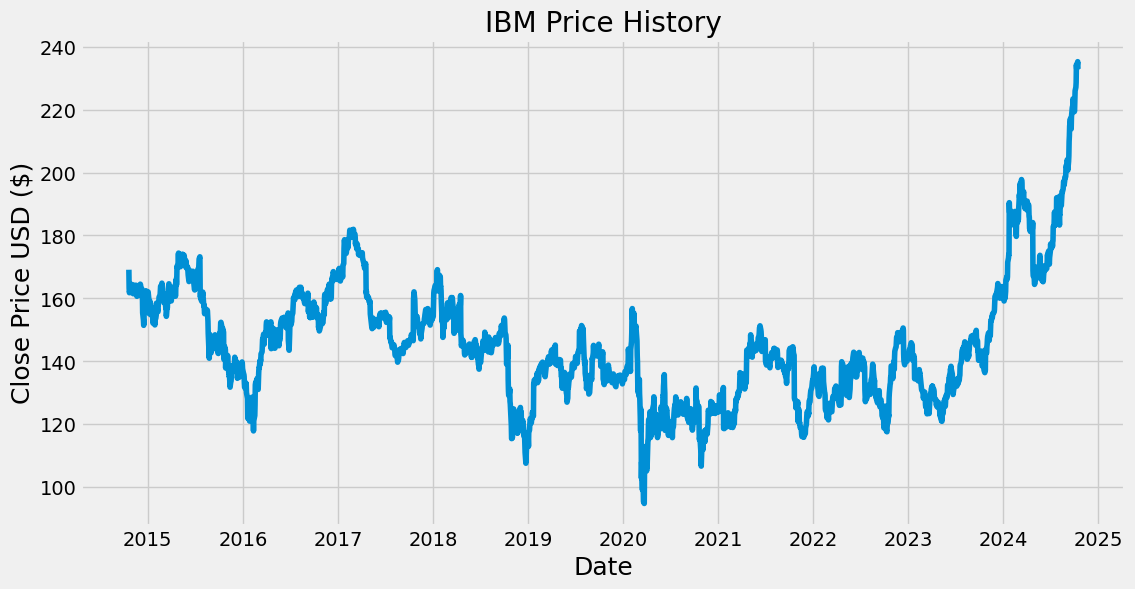

In [8]:
# Visualize the closing price history
plt.figure(figsize=(12, 6))
plt.title(symbol + " " +'Price History')
plt.plot(data['close'])
plt.xlabel('Date',fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [9]:
# Create a new dataframe with only the Close column
data = data.filter(['close'])
# Convert the data frame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
# training_data_len = math.ceil(len(dataset) * 0.8)

# training_data_len

In [10]:
dataset.shape

(2514, 1)

In [11]:
# Assuming `data` is your dataset and `dataset` is a numpy array of the 'close' prices

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [12]:
# Create the training data set
# Create the scaled training data set
training_data_len = int(np.ceil(len(dataset) * 0.8))      # Define your training data length
train_data = scaled_data[0:training_data_len, :]



# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.5290768 , 0.48729447, 0.47704463, 0.47982063, 0.47910883,
       0.47761407, 0.48992811, 0.4889316 , 0.49526657, 0.49562246,
       0.49533775, 0.48316606, 0.47725817, 0.47469571, 0.47903765,
       0.48914513, 0.48779273, 0.47796996, 0.48416257, 0.49391416,
       0.49391416, 0.47775642, 0.47448217, 0.46885899, 0.47085202,
       0.47960709, 0.47683109, 0.4781835 , 0.47974945, 0.47526514,
       0.48330842, 0.49647662, 0.49313118, 0.48757919, 0.47754289,
       0.48558616, 0.46793366, 0.47191971, 0.43141861, 0.41490498,
       0.40316037, 0.4068617 , 0.44778988, 0.45369777, 0.47455335,
       0.4802477 , 0.47725817, 0.4809595 , 0.46793366, 0.46465941,
       0.4674354 , 0.47896647, 0.46081572, 0.43632999, 0.42906968,
       0.45305716, 0.45796854, 0.43896363, 0.44159727, 0.43440814])]
[0.4256530713929817]



In [13]:
train_data.shape

(2012, 1)

In [14]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
# Reshape the data to 3 dimensions for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1952, 60, 1)

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
# Compile the model

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Train the model
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

1952/1952 [==============================] - 67s 31ms/step - loss: 0.0014


In [20]:
# Lets create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_tests and y-test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
test_data.shape

(562, 1)

In [23]:
# Reshape the data to 3 dimensions for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 23ms/step


In [25]:
# Get the root mean squared error (RMSE)            # NEW RMSE - 0.09038606374448607, RMSE - 0.12703306403293063, RMSE - 0.13971389522397235, 
rmse =np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

1.4032668392591743

In [26]:
# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [27]:
# Assuming `predictions` and `y_test` are already defined as numpy arrays
mape = mean_absolute_percentage_error(y_test, predictions)
accuracy = 100 - mape

print(f'MAPE: {mape}%')
print(f'Accuracy: {accuracy}%')

MAPE: 1.4585963582110817%
Accuracy: 98.54140364178892%


The Mean Absolute Error (MAE) is calculated as the average of the absolute differences between predicted and true values. The formula for MAE is:

MAE= 
n
∑ 
i=1
n
​
 ∣y 
pred
​
 −y 
true
​
 ∣
​


In [28]:
# Get the Mean Absolute Error (MAE) 
mae = np.mean(np.abs(predictions - y_test))
mae

2.277804772730367

In [29]:
# Get R^2

# Calculate the mean of the true values
mean_true_values = np.mean(y_test)

# Calculate the total sum of squares
total_sum_of_squares = np.sum((y_test - mean_true_values)**2)

# Calculate the residual sum of squares
residual_sum_of_squares = np.sum((y_test - predictions)**2)

# Calculate R^2
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

r_squared

0.986997607737328

Plot the predicted Stock data and actual stock price in the same graph

C:\Users\sanud\AppData\Local\Temp\ipykernel_10176\1014645672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


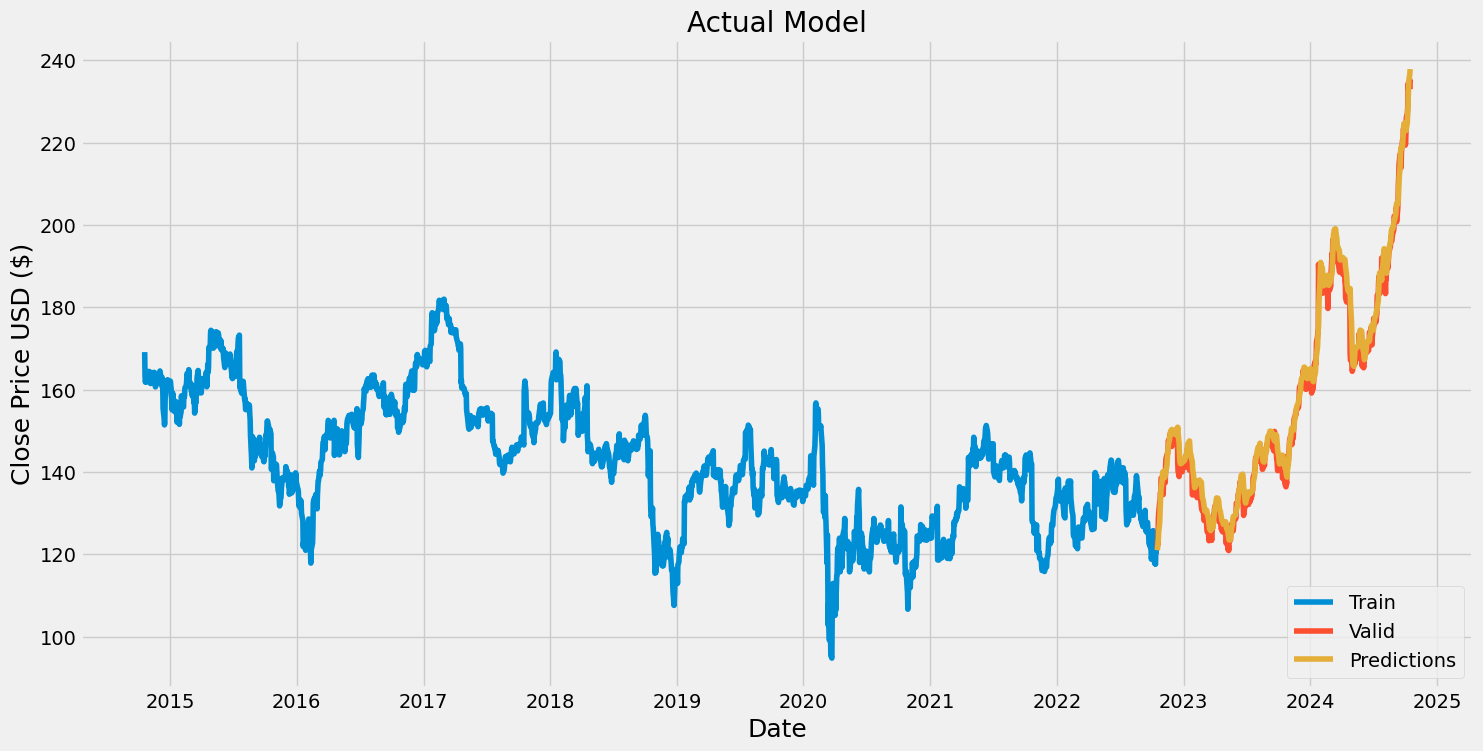

In [30]:
# Plot the training and validation data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Actual Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc= 'lower right')

Predict the future 30 days and plot output

In [31]:
# Predict the future 30 days stock prices
# Step 1: Prepare the last 60 days of data for prediction
last_60_days = scaled_data[-60:]

# Step 2: Make future predictions
future_predictions = []

for _ in range(30):
    x_input = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    prediction = model.predict(x_input)
    future_predictions.append(prediction[0])
    last_60_days = np.append(last_60_days[1:], prediction, axis=0)

future_predictions = scaler.inverse_transform(future_predictions)

# Step 3: Extend the original data for visualization
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_data = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predictions'])
valid_and_future = pd.concat([valid, future_data], axis=0)


1/1 [==============================] - 0s 36ms/step


In [32]:
future_predictions

array([[237.8641354 ],
       [238.97564763],
       [240.35522374],
       [241.84377723],
       [243.38639234],
       [244.9622349 ],
       [246.56227792],
       [248.18139657],
       [249.81614085],
       [251.46352965],
       [253.12090008],
       [254.78589073],
       [256.45629088],
       [258.13015782],
       [259.80564928],
       [261.48119098],
       [263.15530913],
       [264.82668065],
       [266.49418345],
       [268.15667869],
       [269.81321174],
       [271.46279449],
       [273.10458955],
       [274.73770929],
       [276.36133309],
       [277.97464029],
       [279.57679351],
       [281.16698887],
       [282.74440572],
       [284.30817319]])

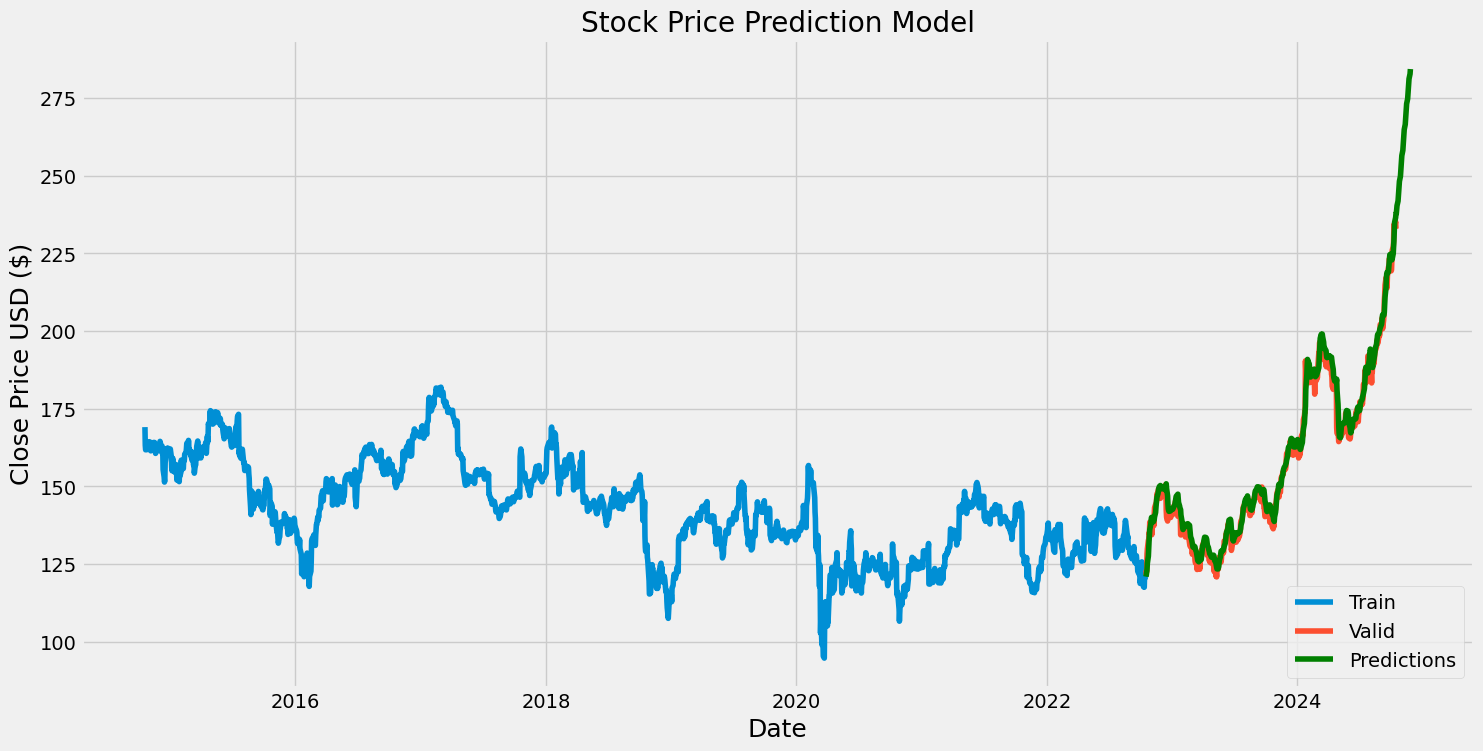

In [33]:
# Step 4: Visualize the results
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'], label='Train')
plt.plot(valid[['close']], label='Valid')
plt.plot(valid_and_future[['Predictions']], label='Predictions', color='green')
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

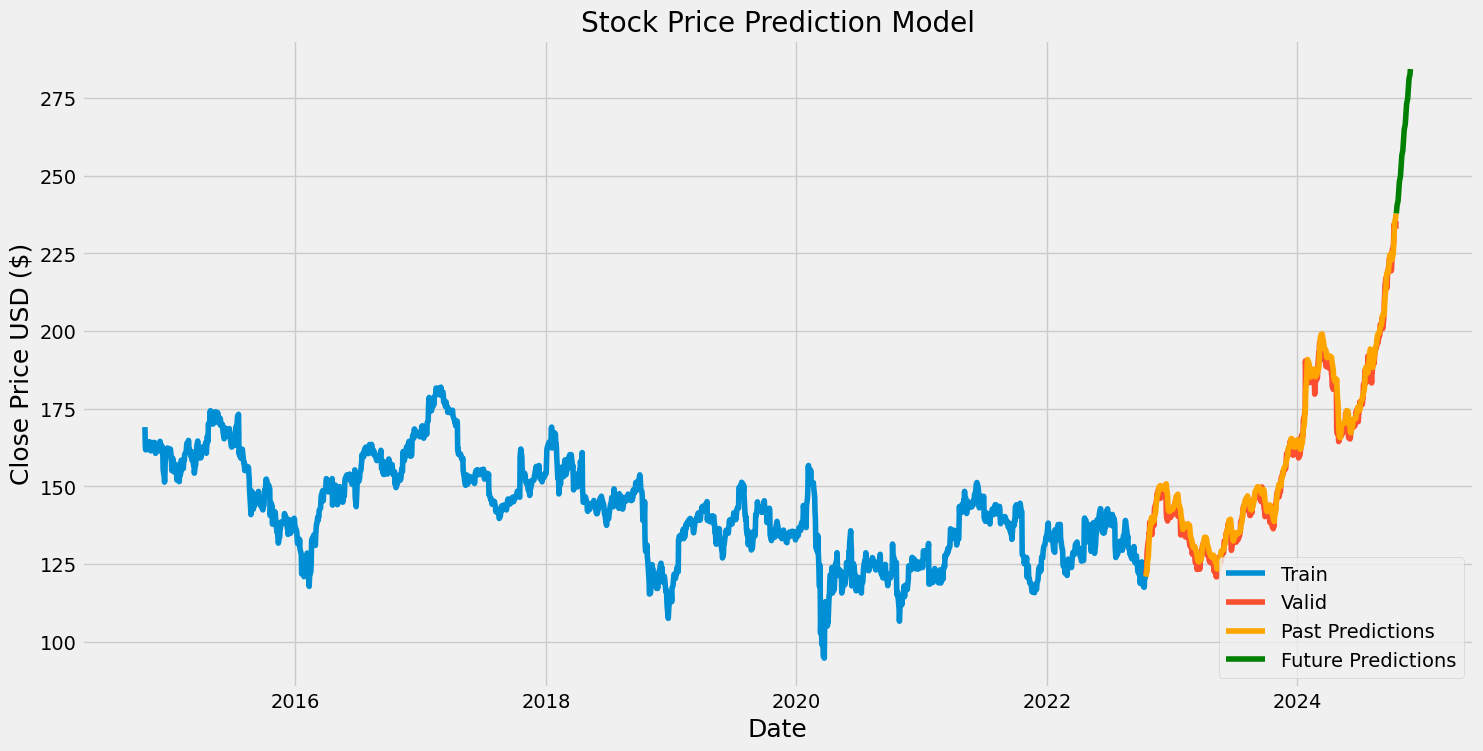

In [34]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Valid')
plt.plot(valid.index, valid['Predictions'], label='Past Predictions', color='orange')
plt.plot(future_data.index, future_data['Predictions'], label='Future Predictions', color='green')
plt.legend(['Train', 'Valid', 'Past Predictions', 'Future Predictions'], loc='lower right')
plt.show()

In [35]:
len(test_data)

562

In [36]:
x_input = test_data[256:].reshape(1, -1)
x_input.shape

(1, 306)

In [37]:
temp_input = list(x_input)
temp_input =temp_input[0].tolist()

In [38]:
temp_input

[0.35169762972453544,
 0.3456473770375116,
 0.3516264502811587,
 0.35361947469570765,
 0.352124706384796,
 0.3659335183998861,
 0.36401167342871366,
 0.33966830379386426,
 0.34507794149049753,
 0.3441526087265997,
 0.3355398960780126,
 0.3352551783045056,
 0.32650010676916497,
 0.3266424656559185,
 0.331980923909175,
 0.33817353548295237,
 0.33255035945618905,
 0.3462168125845254,
 0.3472133247918002,
 0.3600256245996155,
 0.364794647305858,
 0.3678553633710583,
 0.3707737205495053,
 0.37056018221937503,
 0.37846110043419456,
 0.3798135098583527,
 0.37931525375471564,
 0.375471563812371,
 0.3766104349063991,
 0.38159299594277163,
 0.36678767172040716,
 0.3685671578048261,
 0.37426151327496615,
 0.36458110897572793,
 0.35817495907182006,
 0.3683536194746958,
 0.3919140152324009,
 0.3744750516050964,
 0.3711296177663891,
 0.36806890170118856,
 0.3450067620471208,
 0.3445085059434835,
 0.33319097444657986,
 0.32408000569435547,
 0.32763897786319307,
 0.32472062068474605,
 0.32956082283436

Calculate the new day to predicted day

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of a Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

In [39]:
valid

,close,Predictions
2022-10-17,121.52,120.973640
2022-10-18,122.94,121.587166
2022-10-19,122.51,122.549377
2022-10-20,128.30,123.371819
2022-10-21,129.90,125.281418
...,...,...
2024-10-09,234.30,229.141678
2024-10-10,233.02,232.577805
2024-10-11,233.26,235.018829
2024-10-14,235.26,236.519180


The prices of Apple stock are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [40]:
data.head(10)


,close
2014-10-20,169.10
2014-10-21,163.23
2014-10-22,161.79
2014-10-23,162.18
2014-10-24,162.08
2014-10-27,161.87
2014-10-28,163.60
2014-10-29,163.46
2014-10-30,164.35
2014-10-31,164.40


In [41]:
data['close'].shape

(2514,)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [42]:
data = data.drop(['close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [43]:
data.isnull().sum()

Series([], dtype: float64)

This implies that there are no null values in the data set provided.

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.